<a href="https://colab.research.google.com/github/cyruskimani/Autolib-Dataset-Sampling/blob/main/Week_7_Monday_Quantile_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Quantile Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


As we have seen, linear regression models make a key assumption about the random error term in the linear model. The assumption is that the error term has a constant variance across the values of independent variable X. However, when the assumption is no longer true, we use quantile regression. The following example will help us understand how we can use quantile regression while working on such a problem.

## Example: Quantile Regression

In [ ]:
# Importing the required libraries
# 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
x = np.arange(100).reshape(100,1)
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [ ]:
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)
error_

array([[-0.06680632],
       [ 1.37176596],
       [ 0.56960873],
       [ 0.93547754],
       [ 0.76946326],
       [-0.00396293],
       [ 1.40812557],
       [-0.63633659],
       [ 2.60607753],
       [-0.47519375],
       [-1.57809372],
       [-0.57779202],
       [ 0.42176425],
       [ 0.03871092],
       [-1.46653558],
       [ 0.23029029],
       [ 1.56712156],
       [ 0.49120995],
       [ 0.79120281],
       [-0.34838535],
       [-0.70637961],
       [-2.77502444],
       [-0.7790702 ],
       [ 0.62104026],
       [-0.19974308],
       [-0.10053784],
       [-0.41938767],
       [-2.0228352 ],
       [-0.4681783 ],
       [-2.01910641],
       [-0.9265415 ],
       [-0.3616519 ],
       [ 0.50805826],
       [ 0.00990718],
       [ 0.00561261],
       [ 1.07203458],
       [ 0.89205929],
       [ 0.12020189],
       [-2.03606244],
       [-1.9370142 ],
       [ 0.09726077],
       [ 0.49322669],
       [ 1.45644686],
       [ 0.32111906],
       [-0.84337409],
       [-0

Text(0.5, 1.0, 'Data with constant variance')

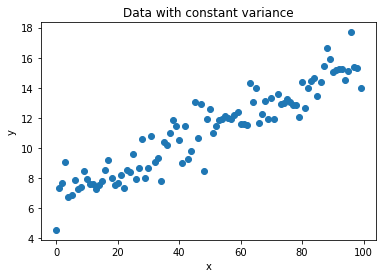

In [ ]:
## Generating some data with constant variance /noise
# This is the assumption of linear regression
# 
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)

## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

# When we move from left to right along the x-axis, 
# we won’t see a lot of variation in the values of y. 
# An linear regression would be the ideal candidate 
# here to model the data.

In [ ]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))


Mean squared error: 0.94
Variance score: 0.88


Text(0.5, 1.0, 'Linear regression')

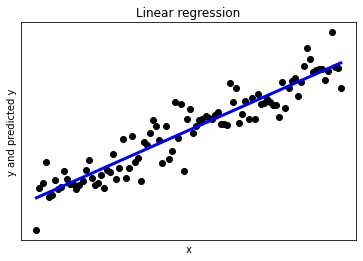

In [ ]:
## Plotting the regression
plt.figure(2)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred1, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

# This will lead to us having modeled our data well on our dataset.
# Our variance score of 0.88 is close to 1 which usually is when
# we model our data perfectly. 
# NB: our variance score will vary based on the randomly generated values above

Text(0.5, 1.0, 'Data with non-constant variance')

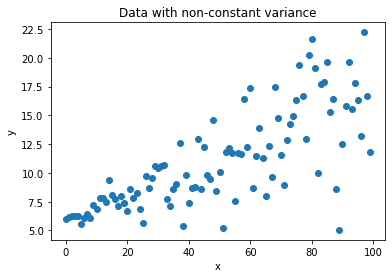

In [ ]:
## Now let get to work with some data that violates 
# our linear regression assumption. This means first 
# adding some noise to our dataset. 
# We will first generating some data with non-constant variance
# 
x_ = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## Non constant variance
var_ = 0.1 + 0.05 * x_

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = var_)

## Linear egression equation
y_ = intercept_ + slope_ * x_ + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with non-constant variance")

# From our graph, we will get to see that a phenomenon
# where the variability of y is unequal across the range 
# of values of x is called as Heteroscedasticity. 
# As it will be seen in the plot it takes the shape of a cone. 
# The y variable widens as the value of x increases.

In [ ]:
## Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x_, y_)))

# With a low variance score of 0.51, it means that our linear regression 
# did not do a good job. 

Mean squared error: 7.78
Variance score: 0.55


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

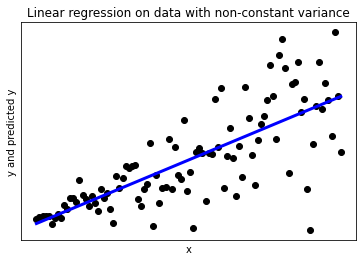

In [ ]:
## We can also see this by plotting the regression below
#
plt.figure(4)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression on data with non-constant variance")

# We will get to observe that our line of best fit is far from perfect

In [ ]:
## Now implementing quantile regression for the median, 0.5th quantile
#

# We import the required libraries
#  
import pandas as pd 

# We take the data into a pandas dataframe so that 
# its easier for us to work with statsmodel interfaces. 
# Our dataframe data has two columns, ‘x’ and ‘y’
#
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"])
data.head()

,x,y
0,0.0,5.981717
1,1.0,6.143381
2,2.0,6.237237
3,3.0,6.291227
4,4.0,6.218710


In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4341
Model:                       QuantReg   Bandwidth:                       2.158
Method:                 Least Squares   Sparsity:                        5.490
Date:                Mon, 15 Feb 2021   No. Observations:                  100
Time:                        15:19:01   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7771      0.545     10.602      0.000       4.696       6.858
x              0.1104      0.010     11.611      0.000       0.092       0.129


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1   5.442141  0.049542        0.030048        0.069035
1  0.2   5.721731  0.061779        0.039800        0.083757
2  0.3   5.833155  0.081753        0.062343        0.101164
3  0.4   5.758001  0.099471        0.080846        0.118095
4  0.5   5.777086  0.110406        0.091536        0.129277
5  0.6   5.937640  0.117863        0.098233        0.137492
6  0.7   5.981715  0.128025        0.107682        0.148368
7  0.8   5.981716  0.148032        0.125136        0.170928
8  0.9   5.973869  0.169511        0.148123        0.190900


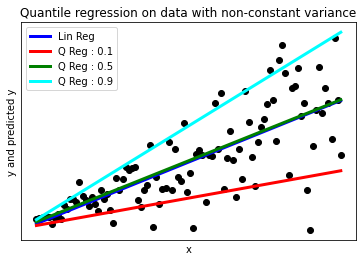

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

<Figure size 432x288 with 0 Axes>

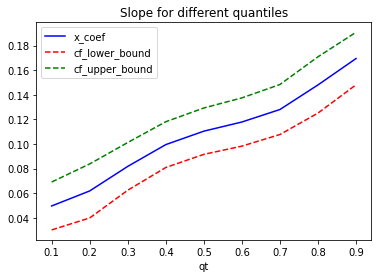

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'],
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

# We would be able to see how the slope value varies for different quantiles. 
# Compared with linear regression which is flat across all the quantiles, 
# Quantile Regression allows us to investigate into the different areas of the data 
# and model them appropriately.

## <font color="green">Challenge 1</font>

In [ ]:
# Challenge 1
# ---
# Question: Study the factors that influence total medical expenditures for people with low-, medium-, and high- expenditures.
# ---
# Dataset url = http://bit.ly/QuantileHealthDataset
# ---
# Info:
# Data are from the Medical Expenditure Panel Survey (MEPS)
# Dependent variable: total medical expenditures
# Independent variables: has supplemental insurance, total number of chronic conditions, age, female, and white
# 
health =pd.read_csv('http://bit.ly/QuantileHealthDataset')
health.head()

,dupersid,totexp,ltotexp,suppins,totchr,age,female,white
0,93193020,3,1.098612,1,0,69,0,1
1,72072017,6,1.791759,1,0,65,1,1
2,25296013,9,2.197225,0,0,85,1,1
3,23628011,14,2.639057,0,0,76,1,1
4,95041014,18,2.890372,0,1,71,1,1


In [ ]:

x = health.drop(['dupersid','totexp','ltotexp'],axis=1)
y = health['totexp']
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', health)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.06092
Model:                       QuantReg   Bandwidth:                       1333.
Method:                 Least Squares   Sparsity:                        7813.
Date:                Mon, 15 Feb 2021   No. Observations:                 2955
Time:                        15:19:04   Df Residuals:                     2949
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2178.9724    941.678     -2.314      0.021   -4025.386    -332.559
x[0]         687.2222    147.928      4.646      0.000     397.170     977.274
x[1]        1332.8333     55.886     23.849      0.000    1223.254    1442.412
x[2]          35.1111     11.449      3.067      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
#for qt in quantiles: 
	#res = mod.fit(q = qt )
	#models.append(res)
  #params.append([qt, res.params['Intercept'], res.params['x[0]']] + res.conf_int().loc['x[0]'].tolist())
	#params.append[qt, res.params['Intercept'], res.params[:,[0,1,2,3,4] + res.conf_int().loc[x[:,[0,1,2,3,4]]].tolist()
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
params.append([qt, res.params['Intercept'], res.params['x[0]']] + res.conf_int().loc['x[0]'].tolist())


# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

# Lastly we make a dataframe of the same name, so we we can view our different models.
#params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
#print(params)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


    qt   intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.9 -390.536585 -298.756097    -2668.781196     2071.269002


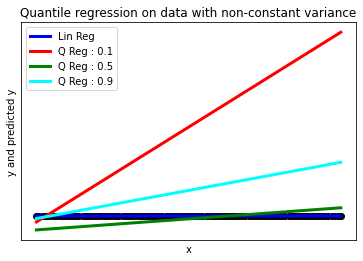

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x[0]'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x[2]'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x[2]'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

## <font color="green">Challenge 2

In [ ]:
# Challenge 2
# ---
# Question: Given the household income data, determine the effect of predictor variables on the independent variable.
# ---
# Dataset source = http://bit.ly/USHouseholdDataset
# ---
# 
household = pd.read_csv('/content/drive/MyDrive/Moringa Core Module 2 Regression/kaggle_income.csv/kaggle_income.csv',encoding='latin-1')
household.head()


,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [ ]:

x = health.drop(['dupersid','totexp','ltotexp'],axis=1)
y = health['totexp']
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', health)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

## <font color="green">Challenge 3</font>

In [ ]:
# Challenge 3
# ---
# Question: Create a regression model on the following dataset.
# ---
# Dataset url = http://bit.ly/MtCarsDataset
# ---
# 